In [1]:
# Change directory to the upper directory.
import os

analysis_dir_name = "analysis"

current_dir = os.path.split(os.getcwd())[1]
if current_dir == analysis_dir_name:
    os.chdir("..")

In [2]:
from ai.random_ai import RandomAI
from ai.ai_without_flags import AIWithoutFlags
from ai.ai_with_flags import AIWithFlags
from ai.ai_with_flags2 import AIWithFlags2
from ai.evaluation import scores
from ai.helpers import model_file_path

%matplotlib notebook
import matplotlib.pyplot as plt
from keras.models import load_model
import random

Using TensorFlow backend.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [3]:
seed = 42

num_rows_grid = 10
num_columns_grid = 10
num_bombs_grid = 10
subgrid_radius = 2

num_games = 1000
max_score = (num_rows_grid * num_columns_grid) - num_bombs_grid

model_file_name = model_file_path(num_rows_grid, num_columns_grid, num_bombs_grid, subgrid_radius, with_flags=False)
model_without_flags = load_model(model_file_name)

model_file_name = model_file_path(num_rows_grid, num_columns_grid, num_bombs_grid, subgrid_radius, with_flags=True)
model_with_flags = load_model(model_file_name)

ai_dic = {"Random AI": RandomAI(), "AI without flags": AIWithoutFlags(model_without_flags, subgrid_radius=subgrid_radius),
          "AI with flags": AIWithFlags(model_with_flags, subgrid_radius=subgrid_radius, playful_level=1.15, flag_threshold=0.96),
          "AI with flags 2": AIWithFlags2(model_with_flags, subgrid_radius=subgrid_radius)}

score_list = [] # List of lists of scores.
losing_games_score_list = [] # List of lists of scores of losing games (scores below the maximum score).
for ai_name, ai in ai_dic.items():
    print("{}".format(ai_name))
    random.seed(seed)
    
    score_l = scores(ai, num_games, num_rows_grid, num_columns_grid, num_bombs_grid)
    losing_games_scores = list(filter(lambda score: score < max_score, score_l))
    
    score_list.append(score_l)
    losing_games_score_list.append(losing_games_scores)

Random AI
AI without flags
AI with flags
AI with flags 2


In [4]:
opacity = 1
color = '#FED487'
edge_color = 'black'
mean_color = 'orange'
median_color = 'red'
dot_color = 'black'

save_fig = True
plot_path = analysis_dir_name + "/plots/"
fig_format = 'png'
fig_dpi = 500

<IPython.core.display.Javascript object>


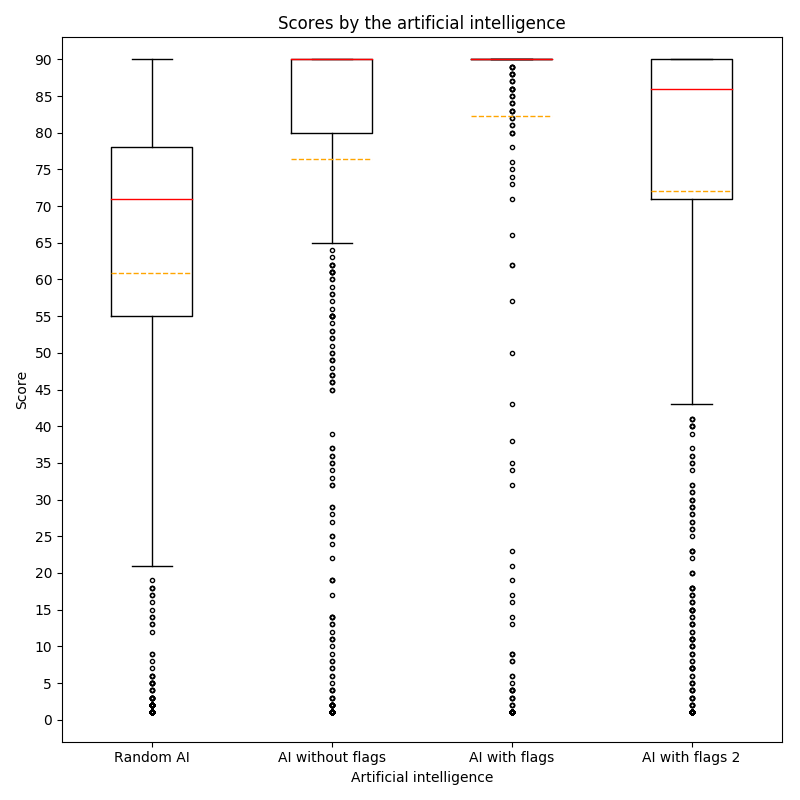

In [5]:
# Box plot of scores by the artificial intelligences.

fig = plt.figure(figsize=(8, 8))
bplot = plt.boxplot(score_list, showmeans=True, meanline=True, sym='.')
plt.xticks(range(1, len(ai_dic) + 1), ai_dic.keys())
plt.yticks(range(0, (max_score + 1), 5))
plt.title('Scores by the artificial intelligence')
plt.xlabel('Artificial intelligence')
plt.ylabel('Score')
plt.ylim(ymin=-3, ymax=(max_score+3))
plt.setp(bplot['means'], color=mean_color)
plt.setp(bplot['medians'], color=median_color)
plt.tight_layout()
plt.show()
if save_fig:
    plt.savefig((plot_path + 'scores_by_ai.' + fig_format), format=fig_format, dpi=fig_dpi)

<IPython.core.display.Javascript object>


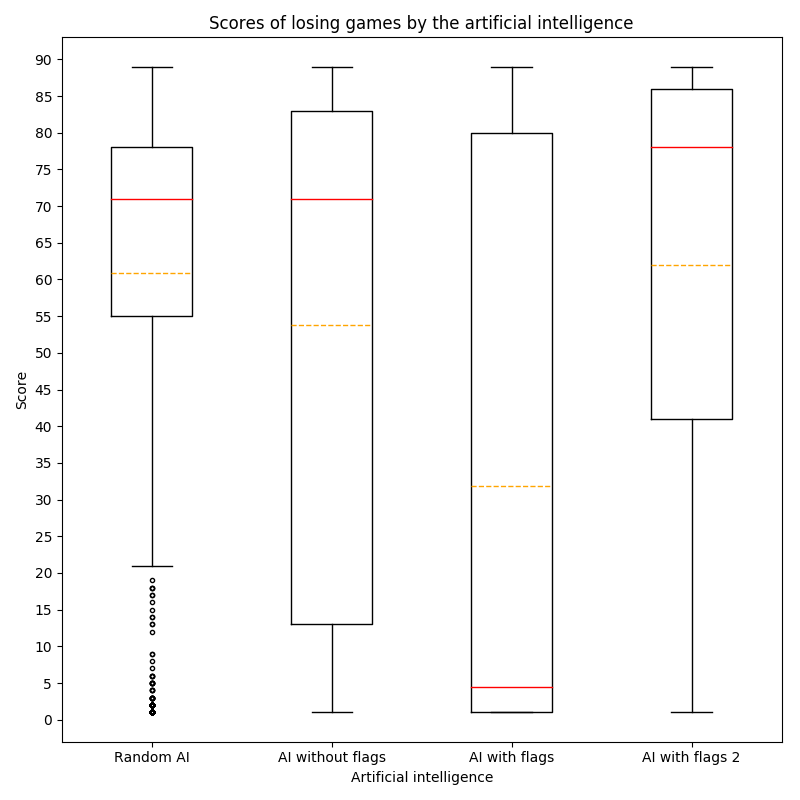

In [6]:
# Box plot of scores of losing games by the artificial intelligence.

fig = plt.figure(figsize=(8, 8))
bplot = plt.boxplot(losing_games_score_list, showmeans=True, meanline=True, sym='.')
plt.xticks(range(1, len(ai_dic) + 1), ai_dic.keys())
plt.yticks(range(0, (max_score + 1), 5))
plt.title('Scores of losing games by the artificial intelligence')
plt.xlabel('Artificial intelligence')
plt.ylabel('Score')
plt.ylim(ymin=-3, ymax=(max_score+3))
plt.setp(bplot['means'], color=mean_color)
plt.setp(bplot['medians'], color=median_color)
plt.tight_layout()
plt.show()
if save_fig:
    plt.savefig((plot_path + 'losing_games_scores_by_ai.' + fig_format), format=fig_format, dpi=fig_dpi)